# IE6511 Homework 3
Done by: Aloisius Stephen and Yang Xiaozhou

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## Question 1.  Markov Chain Configuration Graph with Random Walk
a) 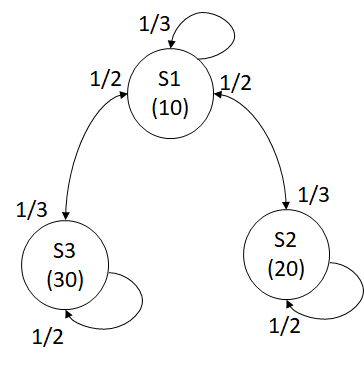 <br>


b) transition probability matrix
\begin{aligned}
\Theta &= 
\begin{bmatrix}
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{2} & 0 & \frac{1}{2}
\end{bmatrix}
\end{aligned}
<br>

c) convergence probability matrix
Let $\pi = [ a \quad b \quad b ]$ where $a,b \in [0,1]$ and $a+b+b=1$, 
<br>


\begin{aligned}
\pi &= \pi \Theta\\
\begin{bmatrix}
a & b & b \\
\end{bmatrix}
&=
\begin{bmatrix}
a & b & b \\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{2} & 0 & \frac{1}{2}
\end{bmatrix} \\
&\Rightarrow \frac{1}{3}a + \frac{1}{2}b + \frac{1}{2}b = a\\
&\Rightarrow b = \frac{2}{3}a \\
\end{aligned}


Substituting to $a+b+b=1 \Rightarrow a+\frac{2}{3}a+\frac{2}{3}a = 1 \Rightarrow a = \frac{3}{7}$

<br>
Therefore solving for $b = \frac{2}{3}a = \frac{2}{7}$, we get
\begin{aligned}
\pi &= 
\begin{bmatrix}
\frac{3}{7} & \frac{2}{7} & \frac{2}{7} \\
\end{bmatrix}
\end{aligned}
<br>

The values of $\pi_2,\pi_3$ are equal because the random walk from S2 and S3 are similar, such that they can only go to either S1 or stay where they are with probability of 0.5. As for $\pi_1$ being slightly larger than the other two convergence probability, it is because from node S2 and S3 they can only go to S1 with probability of 1/2, however from S1 it can go to S2 or S3 with probability of 1/3.

## Question 2. Theory-Configuration Graph and transition probability matrix-Greedy 

a) 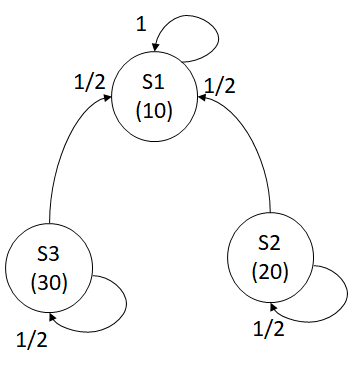
<br>

b)Transition probability matrix
\begin{aligned}
\Theta &= 
\begin{bmatrix}
1 & 0 & 0 \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{2} & 0 & \frac{1}{2}
\end{bmatrix}
\end{aligned}
<br>

c)
Convergence Probability Matrix
\begin{aligned}
\pi &= 
\begin{bmatrix}
1& 0 & 0 \\
\end{bmatrix}
\end{aligned}
<br>

check:
\begin{aligned}
\pi \Theta &=
\begin{bmatrix}
1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{2} & 0 & \frac{1}{2}
\end{bmatrix} 
= 
\begin{bmatrix}
1 & 0 & 0 \\
\end{bmatrix}\\
&= \pi \\
\end{aligned}

The values of $\pi_2,\pi_3$ are equal to 0 because once the search moves out of S2 and S3 to S1, it will remain in S1 since there are no better solution, which is why $\pi_1 =1$
<br>

## Question 3. Configuration SA Transition and convergence Theory

a) Cost for each state:

In [46]:
def cost(x1,x2):
    return 2*np.power((x1-x2),2) + x1

print("State1=(0,1) Costs= %.4f" %cost(0,1))
print("State2=(1,1) Costs= %.4f" %cost(1,1))
print("State3=(0,0) Costs= %.4f" %cost(0,0))
print("State4=(1,0) Costs= %.4f" %cost(1,0))

State1=(0,1) Costs= 2.0000
State2=(1,1) Costs= 1.0000
State3=(0,0) Costs= 0.0000
State4=(1,0) Costs= 3.0000


Transition probability
\begin{align}
P_{12} &=  P_{13} = \frac{1}{2} \\
P_{21} &= 0.5 e^\frac{-1}{T}, \quad P_{24}= 0.5 e^\frac{-2}{T}\\
P_{22} &= 1-0.5 e^\frac{-1}{T} -0.5 e^\frac{-2}{T}\\
P_{31} &= 0.5 e^\frac{-2}{T}, \quad P_{34} = 0.5 e^\frac{-3}{T}\\
P_{33} &= 1-0.5 e^\frac{-2}{T}-0.5 e^\frac{-3}{T}\\
P_{42} &= P_{43} = \frac{1}{2} \\
\end{align}


There are no self-loops for states 1 and 4 because its neighbours have lower costs in both cases therefore the state will move to either 2 or 3, and not stay at its original state as there is no potential uphill move that can be rejected.

b)Transition probability matrix <br>
For $T = 1$,

In [47]:
def transProb(T):

    p21 = 0.5*np.exp(-1/T)
    p24 = 0.5*np.exp(-2/T)
    p22 = 1-p21-p24

    print("P_21 = %.6f" %p21)
    print("P_24 = %.6f" %p24)
    print("P_22 = %.6f" %p22)

    p31 = 0.5*np.exp(-2/T)
    p34 = 0.5*np.exp(-3/T)
    p33 = 1-p31-p34
    
    print("\nP_31 = %.6f" %p31)
    print("P_34 = %.6f" %p34)
    print("P_33 = %.6f" %p33)
    
    P = np.matrix([[0,0.5,0.5,0],[p21,p22,0,p24],[p31,0,p33,p34],[0,0.5,0.5,0]])
    print("\nP = ")
    print(P)
    return P

P = transProb(1)

P_21 = 0.183940
P_24 = 0.067668
P_22 = 0.748393

P_31 = 0.067668
P_34 = 0.024894
P_33 = 0.907439

P = 
[[ 0.     0.5    0.5    0.   ]
 [ 0.184  0.748  0.     0.068]
 [ 0.068  0.     0.907  0.025]
 [ 0.     0.5    0.5    0.   ]]


c)

In [48]:
def matPower(matrix,power):
    sol = matrix

    for i in range(1,power):
        sol = np.matmul(sol,matrix)
    
    return sol

P_5 = matPower(P,5)
P_10 = matPower(P,10)
P_1000 = matPower(P,1000)

print("\nP^5=")
print(P_5)
print("P^10=")
print(P_10)
print("P^1000=")
print(P_1000)


P^5=
[[ 0.098  0.325  0.541  0.036]
 [ 0.12   0.495  0.341  0.044]
 [ 0.073  0.126  0.774  0.027]
 [ 0.098  0.325  0.541  0.036]]
P^10=
[[ 0.092  0.272  0.602  0.034]
 [ 0.1    0.341  0.522  0.037]
 [ 0.082  0.192  0.697  0.03 ]
 [ 0.092  0.272  0.602  0.034]]
P^1000=
[[ 0.087  0.237  0.644  0.032]
 [ 0.087  0.237  0.644  0.032]
 [ 0.087  0.237  0.644  0.032]
 [ 0.087  0.237  0.644  0.032]]


The probability distribution will be  $\,[0.087 \quad 0.237 \quad 0.644 \quad 0.032]$

d) for T= 10

In [49]:
P = transProb(10)
P_5 = matPower(P,5)
P_10 = matPower(P,10)
P_1000 = matPower(P,1000)

print("\nP^5=")
print(P_5)
print("P^10=")
print(P_10)
print("P^1000=")
print(P_1000)

P_21 = 0.452419
P_24 = 0.409365
P_22 = 0.138216

P_31 = 0.409365
P_34 = 0.370409
P_33 = 0.220226

P = 
[[ 0.     0.5    0.5    0.   ]
 [ 0.452  0.138  0.     0.409]
 [ 0.409  0.     0.22   0.37 ]
 [ 0.     0.5    0.5    0.   ]]

P^5=
[[ 0.128  0.368  0.388  0.116]
 [ 0.333  0.165  0.2    0.302]
 [ 0.317  0.181  0.215  0.287]
 [ 0.128  0.368  0.388  0.116]]
P^10=
[[ 0.277  0.221  0.251  0.251]
 [ 0.2    0.297  0.322  0.181]
 [ 0.206  0.291  0.316  0.186]
 [ 0.277  0.221  0.251  0.251]]
P^1000=
[[ 0.236  0.261  0.289  0.214]
 [ 0.236  0.261  0.289  0.214]
 [ 0.236  0.261  0.289  0.214]
 [ 0.236  0.261  0.289  0.214]]


The probability distribution will be  $\,[0.236 \quad 0.261 \quad 0.289 \quad 0.214]$

e) for T= 0.2

In [50]:
P = transProb(0.2)
P_5 = matPower(P,5)
P_10 = matPower(P,10)
P_1000 = matPower(P,1000)

print("\nP^5=")
print(P_5)
print("P^10=")
print(P_10)
print("P^1000=")
print(P_1000)

P_21 = 0.003369
P_24 = 0.000023
P_22 = 0.996608

P_31 = 0.000023
P_34 = 0.000000
P_33 = 0.999977

P = 
[[  0.000e+00   5.000e-01   5.000e-01   0.000e+00]
 [  3.369e-03   9.966e-01   0.000e+00   2.270e-05]
 [  2.270e-05   0.000e+00   1.000e+00   1.530e-07]
 [  0.000e+00   5.000e-01   5.000e-01   0.000e+00]]

P^5=
[[  1.685e-03   4.958e-01   5.025e-01   1.135e-05]
 [  3.341e-03   9.899e-01   6.757e-03   2.251e-05]
 [  2.281e-05   4.553e-05   9.999e-01   1.537e-07]
 [  1.685e-03   4.958e-01   5.025e-01   1.135e-05]]
P^10=
[[  1.671e-03   4.916e-01   5.067e-01   1.126e-05]
 [  3.313e-03   9.815e-01   1.514e-02   2.232e-05]
 [  2.300e-05   1.020e-04   9.999e-01   1.550e-07]
 [  1.671e-03   4.916e-01   5.067e-01   1.126e-05]]
P^1000=
[[  3.454e-04   9.628e-02   9.034e-01   2.327e-06]
 [  6.487e-04   1.868e-01   8.126e-01   4.371e-06]
 [  4.101e-05   5.475e-03   9.945e-01   2.763e-07]
 [  3.454e-04   9.628e-02   9.034e-01   2.327e-06]]


The probability distribution cannot be determined since it has not converged at the 1000th iteration

f) For T= 1 we can see that the probability of being in the global minimum (state 3) is the highest at 0.644, whereas at T = 10, the probability distribution is quite evenly distributed across the 4 states (ranging from 0.214 - 0.289) which means the probability of being at any state and reaching the global minimum (state 3) is almost as likely. <br>
As for T = 0.2 even though the probability distribution has yet to converge, from the $P^{1000}$ probability distribution we can see that state 3 has the highest probability regardless of where the starting state is with range of 0.812-0.994. <br> 
It is therefore important to set an appropriate temperature so that the algorithm does not constantly leave the global minimum (when temperature is too high) or get stuck in a local minimum (when the temperature is too low)

## Question 4. GA schema 

a)
<br>

b)
<br>

c)
<br>

d)
<br>